# Rating based Recommendation System

https://www.kaggle.com/code/ibtesama/getting-started-with-a-movie-recommendation-system

In [16]:
import pandas as pd

import numpy as np

In [17]:

#this code threw an error, the back slash doesn't work 
#df1=pd.read_csv('D:\AI Local\practice_projects\project_files\data\tmdb_5000_credits.csv')

#so I changed it to slash or forward slash and it worked:
df1=pd.read_csv('D:/AI Local/practice_projects/project_files/data/tmdb_5000_credits.csv')

#or the path can be given as:

df1=pd.read_csv('../project_files/data/tmdb_5000_credits.csv')

df2=pd.read_csv("D:\\AI Local\\practice_projects\\project_files\\data\\tmdb_5000_movies.csv")

In [18]:
df1.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

In [19]:
#df1.columns=['id','tittle','cast','crew']
df1.rename(columns={'movie_id':'id'},inplace=True)
df1.rename(columns={"title":"tittle"},inplace=True)

In [20]:
df2=df2.merge(df1,on='id')

In [21]:
df2.head(2).T
#,df2["cast"].head(2)

0  \
budget                                                        237000000   
genres                [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
homepage                                    http://www.avatarmovie.com/   
id                                                                19995   
keywords              [{"id": 1463, "name": "culture clash"}, {"id":...   
original_language                                                    en   
original_title                                                   Avatar   
overview              In the 22nd century, a paraplegic Marine is di...   
popularity                                                   150.437577   
production_companies  [{"name": "Ingenious Film Partners", "id": 289...   
production_countries  [{"iso_3166_1": "US", "name": "United States o...   
release_date                                                 2009-12-10   
revenue                                                      2787965087   
runtime                                                           162.0   
spoken_languages      [{"iso_639_1": "en", "name": "English"}, {"iso...   
status                                                         Released   
tagline                                     Enter the World of Pandora.   
title                                                            Avatar   
vote_average                                                        7.2   
vote_count                                                        11800   
tittle                                                           Avatar   
cast                  [{"cast_id": 242, "character": "Jake Sully", "...   
crew                  [{"credit_id": "52fe48009251416c750aca23", "de...   

                                                                      1  
budget                                                        300000000  
genres                [{"id": 12, "name": "Adventure"}, {"id": 14, "...  
homepage                   http://disney.go.com/disneypictures/pirates/  
id                                                                  285  
keywords              [{"id": 270, "name": "ocean"}, {"id": 726, "na...  
original_language                                                    en  
original_title                 Pirates of the Caribbean: At World's End  
overview              Captain Barbossa, long believed to be dead, ha...  
popularity                                                   139.082615  
production_companies  [{"name": "Walt Disney Pictures", "id": 2}, {"...  
production_countries  [{"iso_3166_1": "US", "name": "United States o...  
release_date                                                 2007-05-19  
revenue                                                       961000000  
runtime                                                           169.0  
spoken_languages               [{"iso_639_1": "en", "name": "English"}]  
status                                                         Released  
tagline                  At the end of the world, the adventure begins.  
title                          Pirates of the Caribbean: At World's End  
vote_average                                                        6.9  
vote_count                                                         4500  
tittle                         Pirates of the Caribbean: At World's End  
cast                  [{"cast_id": 4, "character": "Captain Jack Spa...  
crew                  [{"credit_id": "52fe4232c3a36847f800b579", "de...

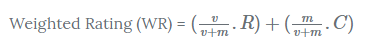

where,

v is the number of votes for the movi
e;
m is the minimum votes required to be listed in the cha
rt;
R is the average rating of the movie;

 And
C is the mean vote across the whole report

In [22]:
C=df2["vote_average"].mean()

In [23]:
df2["vote_average"].head(10).mean()

6.779999999999999

In [24]:
#value of votes at 90% quantile, that is after that point, 10% movies are with atleast this vote count 
m=df2["vote_count"].quantile(.9)
m

1838.4000000000015

In [25]:
q_movies=df2.copy().loc[df2["vote_count"]>=m]

In [26]:
q_movies.shape

(481, 23)

In [27]:
def weighted_rating(x,m=m,C=C):
    v=x["vote_count"]
    R=x["vote_average"]
    #return (((v/v+m)*R)+((m/v+m)*C)) #THIS HAD AN ERROR - V+M SHOULD HAVE BEEN ENCLOSED IN A BRACKET SO THE ADDITION CAN BE DONE FIRST BEFORE DIVISION
    
    return (v/(v+m) * R) + (m/(m+v) * C)

In [28]:
q_movies['score']=q_movies.apply(weighted_rating,axis=1)

In [29]:
q_movies.head(2)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   

                                       homepage     id  \
0                   http://www.avatarmovie.com/  19995   
1  http://disney.go.com/disneypictures/pirates/    285   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   

                                production_companies  ...  \
0  [{"name": "Ingenious Film Partners", "id": 289...  ...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...  ...   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   

                                      title vote_average vote_count  \
0                                    Avatar          7.2      11800   
1  Pirates of the Caribbean: At World's End          6.9       4500   

                                     tittle  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   

                                                crew     score  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  7.050669  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  6.665696  

[2 rows x 24 columns]

In [30]:
q_movies=q_movies.sort_values('score',ascending=False)

In [31]:
q_movies[['title','vote_count','vote_average','score']].head(10)

title  vote_count  vote_average  \
1881                       The Shawshank Redemption        8205           8.5   
662                                      Fight Club        9413           8.3   
65                                  The Dark Knight       12002           8.2   
3232                                   Pulp Fiction        8428           8.3   
96                                        Inception       13752           8.1   
3337                                  The Godfather        5893           8.4   
95                                     Interstellar       10867           8.1   
809                                    Forrest Gump        7927           8.2   
329   The Lord of the Rings: The Return of the King        8064           8.1   
1990                        The Empire Strikes Back        5879           8.2   

         score  
1881  8.059258  
662   7.939256  
65    7.920020  
3232  7.904645  
96    7.863239  
3337  7.851236  
95    7.809479  
809   7.803188  
329   7.727243  
1990  7.697884

Text(0, 0.5, 'Movie Title')

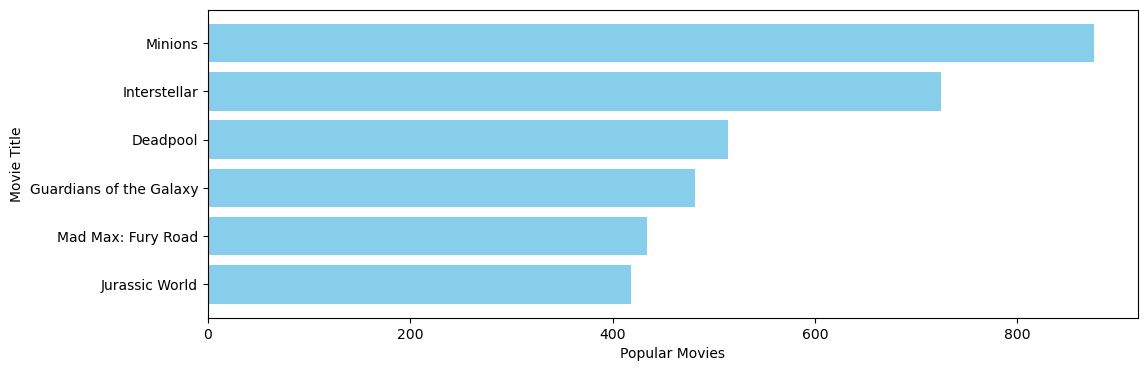

In [32]:
#sorting by popularity 

pop=df2.sort_values('popularity',ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.barh(pop['title'].head(6),pop['popularity'].head(6),align='center',color='skyblue')
plt.gca().invert_yaxis()# GCA: get current axis, invert_yaxis: inverts the scale from one side to other 9unside down, left to right etc)
#plt.gca().invert_xaxis()
plt.xlabel("Popular Movies")
plt.ylabel("Movie Title")

In [36]:
df2["overview"].head(2)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
Name: overview, dtype: object

# Content Based Filtering 

## Review Based Recommendation

In [37]:
#TF-IDF means Term Frequency - Inverse Document Frequency. This is a statistic that is based on the frequency of a word in the corpus 
#but it also provides a numerical representation of how important a word is for statistical analysis.
#Corpus: In linguistics and natural language processing, a corpus or text corpus is a dataset, consisting of natively digital and older, 
#digitalized, language resources, either annotated or unannotated.
#Higher value of tfidf signifies higher importance of the words in the corpus while lower values represent lower importance. 
    
from sklearn.feature_extraction.text import TfidfVectorizer

In [38]:
tfidf=TfidfVectorizer(stop_words='english')
df2["overview"]=df2["overview"].fillna("")


In [39]:
tfidf_matrix=tfidf.fit_transform(df2["overview"])
tfidf_matrix.shape

(4803, 20978)

In [40]:
tfidf_matrix[0]

<1x20978 sparse matrix of type '<class 'numpy.float64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [41]:
#Now finding similarity between movies, this can be done using  euclidean, the Pearson and the cosine similarity scores.
# we will use cosine similarity score. we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.

In [42]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim=linear_kernel(tfidf_matrix,tfidf_matrix)
cosine_sim.shape,cosine_sim[0:2]

((4803, 4803),
 array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 1.        , 0.        , ..., 0.02160533, 0.        ,
         0.        ]]))

In [43]:
#A Pandas Series is like a column in a table. It is a one-dimensional array holding data of any type.

indices=pd.Series(df2.index,index=df2["title"]).drop_duplicates()


In [44]:
indices[0:12]

title
Avatar                                       0
Pirates of the Caribbean: At World's End     1
Spectre                                      2
The Dark Knight Rises                        3
John Carter                                  4
Spider-Man 3                                 5
Tangled                                      6
Avengers: Age of Ultron                      7
Harry Potter and the Half-Blood Prince       8
Batman v Superman: Dawn of Justice           9
Superman Returns                            10
Quantum of Solace                           11
dtype: int64

In [45]:
idx=indices['The Dark Knight Rises']
idx
sim_scores=list(enumerate(cosine_sim[idx]))
sim_scores=sorted(sim_scores,key=lambda x:x[1],reverse=True)
 
sim_scores=sim_scores[1:4]# zero index is skipped as it will be the same movie itsel with similarity score of 1
sim_scores

movie_indices=[i[0] for i in sim_scores] # i would return index and score of that index (movie here), so i[0] will return index of that movie

for i in sim_scores:
    print(i[0])

df2["title"].iloc[movie_indices]




65
299
428


65     The Dark Knight
299     Batman Forever
428     Batman Returns
Name: title, dtype: object

In [46]:
"""
These are the following steps we'll follow :-
Get the index of the movie given its title.
Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
Return the titles corresponding to the indices of the top elements."""


def get_recommendation (title,cosine_sim=cosine_sim):
    idx=indices[title]
    #https://www.geeksforgeeks.org/enumerate-in-python/       #e-num-iterate -> count and iterate 
    sim_scores=list(enumerate(cosine_sim[idx]))# it will return the index and similarity score with the provided movie index   
    
    #https://www.freecodecamp.org/news/python-lambda-function-explained/
    #lambda argument(s) : expression
    
    sim_scores=sorted(sim_scores,key=lambda x:x[1],reverse=True)
    sim_scores=sim_scores[1:11]# zero index is skipped as it will be the same movie itsel with similarity score of 1
    movie_indices=[i[0] for i in sim_scores] # i would return index and score of that index (movie here), so i[0] will return index of that movie
    return df2["title"].iloc[movie_indices]
                      



In [47]:
get_recommendation('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

## Credits, Genres and Keywords Based Recommender



Stringified: in textual representation 
- Parsing data in Python involves breaking down a given text or file into smaller parts that can be easily analyzed and manipulated. This process is essential in many applications, such as web scraping, data analysis, and natural language processing

- ast (Abstract Syntax Tree (AST)): The ast module helps Python applications to process trees of the Python abstract syntax grammar. The abstract
  syntax itself might change with each Python release; this module helps to find out programmatically what the current grammar looks like. An abstract
  syntax tree can be generated by passing ast

- literal_eval valuate an expression node or a string containing only a Python literal or container display. The string or node provided may only consist of the following Python literal structures: strings, bytes, numbers, tuples, lists, dicts, sets, booleans, None and Ellipsis.
  
- This can be used for evaluating strings containing Python values without the need to parse the values oneself. It is not capable of evaluating arbitrarily complex expressions, for example involving operators or indexing.




In [48]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast','crew','keywords','genres']
for feature in features:
    df2[feature]=df2[feature].apply(literal_eval)
    


In [49]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x: #check i,the first key of the iteratible, list of dictionaries
        if i['job']=='Director': # when finds a key 'job',check if the job is director 
            return i['name'] #then return the name of the director
    return np.nan
    

In [50]:
df2["crew"][0]

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

In [51]:
# Returns the list top 3 elements or entire list; whichever is more.

#Python isinstance() function returns True if the object is of specified types, and if it does not match then returns False. 

def get_list(x):
    if isinstance(x,list):
        names=[i['name'] for i in x] #will return index error if get_list runs second time (as df[feature] will be updated)
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.

        if len(names)>3:
            names=names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

# Returns the list top 3 elements or entire list; whichever is more.


In [52]:
# Define new director, cast, genres and keywords features that are in a suitable form.

df2['director']=df2['crew'].apply(get_director)


In [53]:
df2['director'][:3]

0     James Cameron
1    Gore Verbinski
2        Sam Mendes
Name: director, dtype: object

In [54]:
#df2['keywords'][0:3]#

#df2['cast'][1]
df2['genres'][0:3],



(0    [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
 1    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
 2    [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...
 Name: genres, dtype: object,)

In [55]:
features=['cast','keywords','genres']
for feature in features:
    df2[feature]=df2[feature].apply(get_list)


In [56]:
df2[['title','cast','director','keywords','genres']].head(3)

title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                               cast        director  \
0  [Sam Worthington, Zoe Saldana, Sigourney Weaver]   James Cameron   
1     [Johnny Depp, Orlando Bloom, Keira Knightley]  Gore Verbinski   
2      [Daniel Craig, Christoph Waltz, Léa Seydoux]      Sam Mendes   

                              keywords                        genres  
0   [culture clash, future, space war]  [Action, Adventure, Fantasy]  
1   [ocean, drug abuse, exotic island]  [Adventure, Fantasy, Action]  
2  [spy, based on novel, secret agent]    [Action, Adventure, Crime]

In [57]:
#The next step would be to convert the names and keyword instances into lowercase and strip all the spaces between them. 
#This is done so that our vectorizer doesn't count the Johnny of "Johnny Depp" and "Johnny Galecki" as the same.

def clean_data(x):
    if isinstance(x,list):
        return [str.lower(i.replace(" ","")) for i in x]
    elif isinstance(x,str):
        return str.lower(x.replace(" ",""))
    else: return ""

        


In [58]:
features=['keywords','cast','director','genres']

for feature in features:
    df2[feature]=df2[feature].apply(clean_data)
    

In [59]:
#create our "metadata soup", which is a string that contains all the metadata that we want to feed to our vectorizer 
#(namely actors, director and keywords).
#str = '-'.join('hello') -->> h-e-l-l-o

def create_soup(x):
    return ' '.join(x['keywords']) +' ' + ' '.join(x['cast'])+' '+' '+x['director'] + ' ' + ' '.join(x['genres'])
    #since director name is often a single name, so JOIN is not used as it would display jamescamroon as j a m e s c a m r o o n

In [60]:
def create_soup_new(x): #aleternate way to do create_soup
    new_soup=""
    for feature in features:
        new_soup=' '+new_soup +' '.join(x[feature])
    return new_soup    

In [61]:
#df2['soup']=df2.apply(create_soup_new,axis=1)


In [62]:
df2['director']

0           jamescameron
1          goreverbinski
2              sammendes
3       christophernolan
4          andrewstanton
              ...       
4798     robertrodriguez
4799         edwardburns
4800          scottsmith
4801          danielhsia
4802     brianherzlinger
Name: director, Length: 4803, dtype: object

In [63]:
pd.set_option('display.max_colwidth', None)


In [64]:
df2['soup']=df2.apply(create_soup, axis=1)


In [65]:
df2['soup'][:4]


0    cultureclash future spacewar samworthington zoesaldana sigourneyweaver  jamescameron action adventure fantasy
1      ocean drugabuse exoticisland johnnydepp orlandobloom keiraknightley  goreverbinski adventure fantasy action
2             spy basedonnovel secretagent danielcraig christophwaltz léaseydoux  sammendes action adventure crime
3       dccomics crimefighter terrorist christianbale michaelcaine garyoldman  christophernolan action crime drama
Name: soup, dtype: object

USING COUNTVECTORIZER


https://www.linkedin.com/pulse/count-vectorizers-vs-tfidf-natural-language-processing-sheel-saket/

-
The next steps are the same as what we did with our plot description based recommender. 
One important difference is that we use the CountVectorizer() instead of TF-IDF. 
This is because we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies.
It doesn't make much intuitive sense. (TF-DIF give ower value to words which have repeatations)

In [66]:
from sklearn.feature_extraction.text import CountVectorizer 

In [67]:
count=CountVectorizer(stop_words='english')
count_matrix=count.fit_transform(df2['soup'])
count_matrix.shape


(4803, 11520)

In [68]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2=cosine_similarity(count_matrix,count_matrix)

In [69]:
# Reset index of our main DataFrame and construct reverse mapping as before
df2=df2.reset_index()
indices=pd.Series(df2.index,index=df2['title'])

In [70]:
#We can now reuse our get_recommendations() function by passing in the new cosine_sim2 matrix as your second argument.

get_recommendation('The Dark Knight Rises',cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

In [71]:
indices[0:10:6]

title
Avatar     0
Tangled    6
dtype: int64

We see that our recommender has been successful in capturing more information due to more metadata and has given us (arguably) better recommendations. It is more likely that Marvels or DC comics fans will like the movies of the same production house. Therefore, to our features above we can add production_company . We can also increase the weight of the director , by adding the feature multiple times in the soup.

# Collaborative Filtering

User based filtering- These systems recommend products to a user that similar users have liked. For measuring the similarity between two users we can either use pearson correlation or cosine similarity.

Item based filtering- Instead of measuring the similarity between users, the item-based CF recommends items based on their similarity with the items that the target user rated. Likewise, the similarity can be computed with Pearson Correlation or Cosine Similarity.



# Singular Value Decomposition


- Since the dataset we used before did not have userId(which is necessary for collaborative filtering) let's load another dataset. We'll be using the Surprise library to implement SVD.
- Surprise is a Python scikit for building and analyzing recommender systems that deal with explicit rating data. Surprise was designed with the following purposes in mind: Give users perfect control over their experiments.
- Singular Value Decomposition (SVD) is a powerful technique in linear algebra that can help you perform various tasks in machine learning, such as dimensionality reduction, data compression, noise reduction, feature extraction, and latent factor analysis.
- https://surpriselib.com/



One way to handle the scalability and sparsity issue created by CF is to leverage a latent factor model to capture the similarity between users and items. Essentially, we want to turn the recommendation problem into an optimization problem. We can view it as how good we are in predicting the rating for items given a user. One common metric is Root Mean Square Error (RMSE). The lower the RMSE, the better the performance. Since we do not know the rating for the unseen items, we will temporarily ignore them. Namely, we are only minimizing RMSE on the known entries in the utility matrix. To achieve minimal RMSE, Singular Value Decomposition (SVD) is adopted as shown in the below formula.

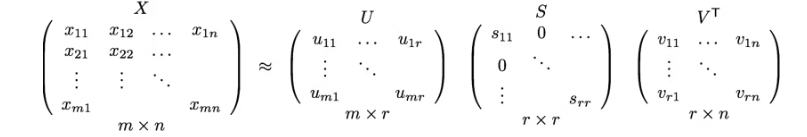
Singular Matrix Decomposition(http://www.cs.carleton.edu/cs_comps/0607/recommend/recommender/images/svd2.png)

X denotes the utility matrix, and U is a left singular matrix, representing the relationship between users and latent factors. S is a diagonal matrix describing the strength of each latent factor, while V transpose is a right singular matrix, indicating the similarity between items and latent factors. Now, you might wonder what do I mean by latent factor here? It is a broad idea which describes a property or concept that a user or an item have. For instance, for music, latent factor can refer to the genre that the music belongs to. SVD decreases the dimension of the utility matrix by extracting its latent factors. Essentially, we map each user and each item into a latent space with dimension r. Therefore, it helps us better understand the relationship between users and items as they become directly comparable. The below figure illustrates this idea.


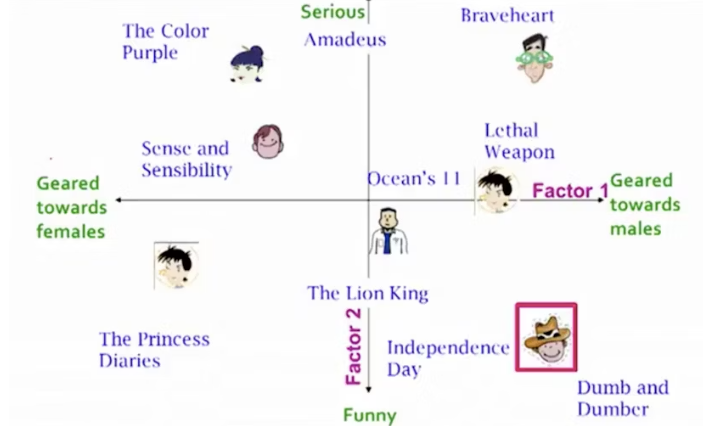

SVD Maps Users and Items Into Latent Space (https://www.youtube.com/watch?v=E8aMcwmqsTg&list=PLLssT5z_DsK9JDLcT8T62VtzwyW9LNepV&index=55)

SVD has a great property that it has the minimal reconstruction Sum of Square Error (SSE); therefore, it is also commonly used in dimensionality reduction. The below formula replace X with A, and S with Σ.

Thus, SVD is a great tool for this optimization problem. To predict the unseen item for a user, we simply multiply U, Σ, and T.

Python Scipy has a nice implementation of SVD for sparse matrix.

The main drawback of SVD is that there is no to little explanation to the reason that we recommend an item to an user. This can be a huge problem if users are eager to know why a specific item is recommended to them.

In [72]:
#conda install -c conda-forge scikit-surprise


#!pip install scikit-surprise
#!pip install pipwin
#!pipwin install scikit-surprise

#!pip3 install scikit-surprise



NOTE: I installed scikit-suprise using above commands but nothing worked
even installed it using miniconda command line (on base location:C:/user/dilawar), it installed but scikit-surprise not imported in the Jupyter
finally it worked when I installed the package using "conda install -c conda-forge scikit-surprise" using miniconda, 
while present in the active envoirtnment 

In [73]:
#from surprise import Reader,Dataset, SVD, evaluate
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

According to the documentation, the evaluate() method was deprecated in version 1.0.5 (functionally replaced by model_selection.cross_validate()) and was removed in version 1.1.0, which is likely what you have installed.


In [79]:
reader=Reader()
('../project_files/data/tmdb_5000_credits.csv')

ratings=pd.read_csv("../project_files/data/ratings_small.csv")

In [87]:
ratings.head()

userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179
2       1     1061     3.0  1260759182
3       1     1129     2.0  1260759185
4       1     1172     4.0  1260759205

In [91]:
#https://surprise.readthedocs.io/en/v1.0.4/getting_started.html

data=Dataset.load_from_df(ratings[['userId','movieId','rating']],reader)
#data.split(n_folds=5)


x.

In [81]:
svd=SVD()

In [94]:
cross_validate(svd,data,measures=['rmse','mae'],cv=5,verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8926  0.9047  0.8982  0.8961  0.9001  0.8983  0.0040  
MAE (testset)     0.6873  0.6964  0.6897  0.6900  0.6925  0.6912  0.0031  
Fit time          1.27    1.46    1.24    1.20    1.42    1.32    0.10    
Test time         0.14    0.29    0.17    0.16    0.65    0.28    0.19    


{'test_rmse': array([0.89257407, 0.90471155, 0.898152  , 0.89613552, 0.90012171]),
 'test_mae': array([0.68730551, 0.69636076, 0.6896701 , 0.68996965, 0.69248126]),
 'fit_time': (1.2675583362579346,
  1.4583606719970703,
  1.2357218265533447,
  1.2038612365722656,
  1.4201276302337646),
 'test_time': (0.1441953182220459,
  0.2920083999633789,
  0.16636872291564941,
  0.15716338157653809,
  0.6544976234436035)}

We get a mean Root Mean Sqaure Error of 0.89 approx which is more than good enough for our case. Let us now train on our dataset and arrive at predictions.

In [97]:
trainset=data.build_full_trainset()
svd.fit(trainset)

In [101]:
ratings[ratings['userId']==1]

userId  movieId  rating   timestamp
0        1       31     2.5  1260759144
1        1     1029     3.0  1260759179
2        1     1061     3.0  1260759182
3        1     1129     2.0  1260759185
4        1     1172     4.0  1260759205
5        1     1263     2.0  1260759151
6        1     1287     2.0  1260759187
7        1     1293     2.0  1260759148
8        1     1339     3.5  1260759125
9        1     1343     2.0  1260759131
10       1     1371     2.5  1260759135
11       1     1405     1.0  1260759203
12       1     1953     4.0  1260759191
13       1     2105     4.0  1260759139
14       1     2150     3.0  1260759194
15       1     2193     2.0  1260759198
16       1     2294     2.0  1260759108
17       1     2455     2.5  1260759113
18       1     2968     1.0  1260759200
19       1     3671     3.0  1260759117

In [102]:
svd.predict(1,302,3) #id of user, id of item

Prediction(uid=1, iid=302, r_ui=3, est=2.6619370086328398, details={'was_impossible': False})

For movie with ID 302, we get an estimated prediction of 2.618. One startling feature of this recommender system is that it doesn't care what the movie is (or what it contains). It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie.